In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
import sys
MY_DRIVE_PATH = '/content/drive/MyDrive/Technion/Diffusion-AD-Project/'
sys.path.append(MY_DRIVE_PATH)
os.chdir(MY_DRIVE_PATH)

Mounted at /content/drive


In [2]:
!pip install blobfile &> /dev/null
!pip install mpi4py &> /dev/null
!pip install pytorch-lightning &> /dev/null

In [3]:
import pytorch_lightning as pl
from IPython.display import Markdown as md
from utils.models import ModelLoader
from utils.noiser import *
from utils.denoiser import *
from utils.error_map import *
from utils.anomaly_scorer import *
from utils.experiment_results_manager import ResultsManager
from core.diffusion_ad import DiffusionAD
from extern.guided_diffusion.guided_diffusion.unet import UNetModel
from extern.guided_diffusion.guided_diffusion import gaussian_diffusion as gd
from config.configuration import DIFFUSION_AD_HPARAMS, DIFFUSION_AD_REQUIRED_HPARAMS, CATEGORY_TO_NOISE_TIMESTEPS

In [4]:
model: UNetModel = None

# **<u>Initialize Experiment</u>**

First, we load and construct all the needed objects for our experiment.

In [5]:
if not model:
    model, diffusion = ModelLoader().get_model('256x256_uncond')

In [6]:
noiser = TimestepUniformNoiser(diffusion)
denoiser = ModelTimestepUniformDenoiser(model, diffusion)
anomaly_map_generator = BatchFilteredSquaredError()
anomaly_scorer = MaxValueAnomalyScorer()
experiment_results_manager = ResultsManager()

In [7]:
diffusion_ad = DiffusionAD(noiser,
                           denoiser,
                           anomaly_map_generator,
                           anomaly_scorer,
                           DIFFUSION_AD_HPARAMS)
diffusion_ad.args.verbosity = 2

In [8]:
trainer = {
    category: pl.Trainer.from_argparse_args(diffusion_ad.args, 
                                            default_root_dir=os.path.join(diffusion_ad.args.root_output_dir, category), 
                                            max_epochs=diffusion_ad.args.num_epochs,
                                            accelerator='gpu',
                                            devices=1) \
           for category in CATEGORY_TO_NOISE_TIMESTEPS.keys()
}

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utili

# **<u>Run Experiment</u>**

## **<u>Object Categories</u>**

First, we will run the evaluation on the different object categories.

In [9]:
OBJECT_CATEGORIES = [
    'hazelnut'
]

md(f'**<u>The object categories are:</u>**\n\n{OBJECT_CATEGORIES}')

**<u>The object categories are:</u>**

['hazelnut']

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Evaluating category: hazelnut


Testing: 0it [00:00, ?it/s]

img min: tensor(-1., device='cuda:0') img max: tensor(1., device='cuda:0')
Transformed input image:


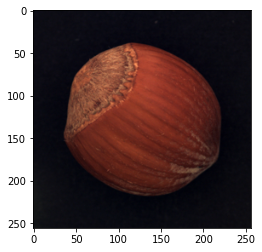

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/252 [00:00<?, ?it/s]

Reconstructed image No. 1:


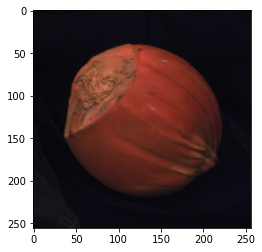

  0%|          | 0/234 [00:00<?, ?it/s]

Reconstructed image No. 2:


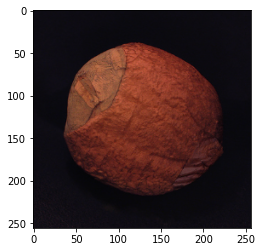

  0%|          | 0/256 [00:00<?, ?it/s]

Reconstructed image No. 3:


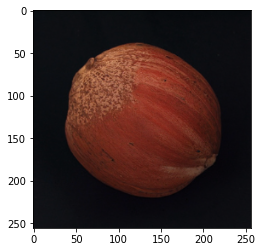

Anomaly Map values:
vmin=0.0004845289007326007, vmax=0.3335041273183604
img min: tensor(-1., device='cuda:0') img max: tensor(1., device='cuda:0')
Transformed input image:


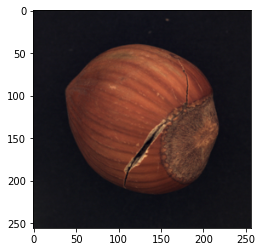

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/236 [00:00<?, ?it/s]

Reconstructed image No. 1:


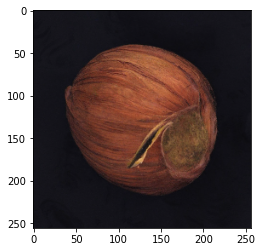

  0%|          | 0/229 [00:00<?, ?it/s]

Reconstructed image No. 2:


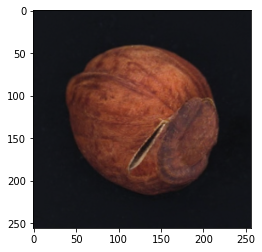

  0%|          | 0/235 [00:00<?, ?it/s]

Reconstructed image No. 3:


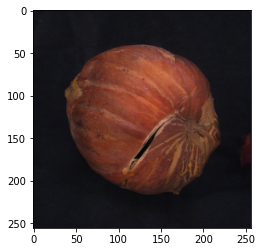

Anomaly Map values:
vmin=0.00029861570911047966, vmax=0.4530359461330827
Total pixel-level auc-roc score :
0.9674143458561562
Total image-level auc-roc score :
1.0
test_epoch_end
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         img_auc                    1.0
        pixel_auc           0.9674143195152283
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [10]:
remaining_categories = experiment_results_manager.get_remaining_categories()
#overwrite = False
overwrite = True

for category in OBJECT_CATEGORIES:
    if overwrite or category in remaining_categories:
        print(f'Evaluating category: {category}')
        diffusion_ad.args.category = category
        trainer[category].test(diffusion_ad)

## **<u>Texture Categories</u>**

Now, we will run the evaluation on the different texture categories.

In [11]:
TEXTURE_CATEGORIES = [
    'tile'
]

md(f'**<u>The texture categories are:</u>**\n\n{TEXTURE_CATEGORIES}')

**<u>The texture categories are:</u>**

['tile']

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Evaluating category: tile



Testing: 0it [00:00, ?it/s]

img min: tensor(-1., device='cuda:0') img max: tensor(1., device='cuda:0')
Transformed input image:


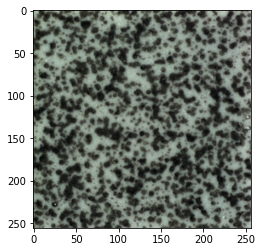

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

Reconstructed image No. 1:


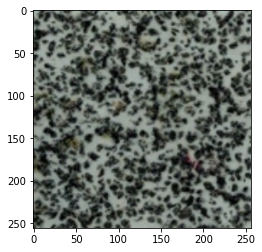

  0%|          | 0/228 [00:00<?, ?it/s]

Reconstructed image No. 2:


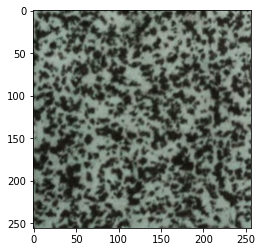

  0%|          | 0/235 [00:00<?, ?it/s]

Reconstructed image No. 3:


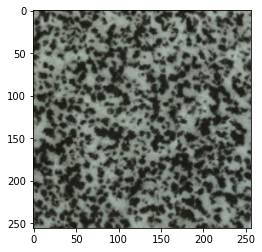

Anomaly Map values:
vmin=0.008836758240034418, vmax=0.636952004921397
img min: tensor(-1., device='cuda:0') img max: tensor(1., device='cuda:0')
Transformed input image:


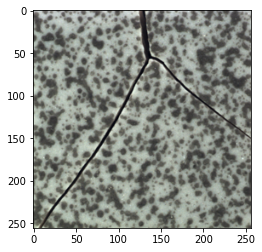

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Reconstructed image No. 1:


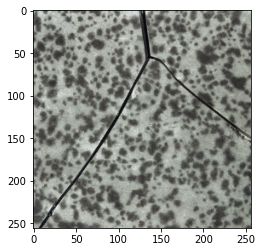

  0%|          | 0/254 [00:00<?, ?it/s]

Reconstructed image No. 2:


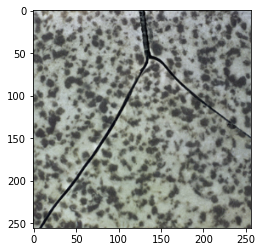

  0%|          | 0/242 [00:00<?, ?it/s]

Reconstructed image No. 3:


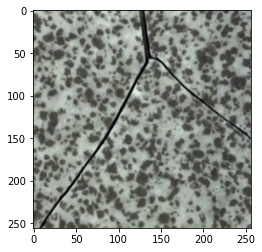

Anomaly Map values:
vmin=0.008795331113375078, vmax=0.4847356254226299
Total pixel-level auc-roc score :
0.6327141943066803
Total image-level auc-roc score :
0.0
test_epoch_end
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         img_auc                    0.0
        pixel_auc           0.6327142119407654
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [12]:
remaining_categories = experiment_results_manager.get_remaining_categories()
#overwrite = False
overwrite = True

for category in TEXTURE_CATEGORIES:
    if overwrite or category in remaining_categories:
        print(f'Evaluating category: {category}\n')
        diffusion_ad.args.category = category
        trainer[category].test(diffusion_ad)